## Inferencia Proyecto Oil & Gas 

### __Definicion de casos de prueba para los test.__

__Formulario de Carga para la inferencia:__

__Datos Físicos:__

+  Pipe_Size_mm: Diámetro del caño.

+  Thickness_mm: Espesor original de pared.

+  Thickness_Loss_mm: (Crítico) Cuánto espesor perdió por corrosión.

+  Max_Pressure_psi: Presión máxima de operación.

+  Temperature_C: Temperatura del fluido.

__Datos de Inspección/Históricos:__
+  Time_Years: Edad del caño.
+  Corrosion_Impact_Percent: Dato de sensor (si no lo tenés claro, asumimos un % de área afectada).
+  Material_Loss_Percent: Porcentaje de material perdido (Debe ser consistente con Thickness_Loss_mm).

Datos Categóricos:
+  Condition: Estado visual (Normal, Moderate, Critical).
+  Material: Tipo de material (Steel, PVC, etc.).
+  Grade: Grado del material (API 5L X52, etc.).

### __Escenarios de prueba__

| Variable         | Caso 1 (Nuevo) | Caso 2 (Promedio A) | Caso 3 (Promedio B) | Caso 4 (Promedio C) | Caso 5 (Crítico) |
|------------------|----------------|-----------------------|-----------------------|-----------------------|-------------------|
| Pipe_Size_mm     | 100            | 200                   | 150                   | 300                   | 250               |
| Thickness_mm     | 10.0           | 12.0                  | 8.0                   | 15.0                  | 10.0              |
| Thickness_Loss   | 0.0            | 2.5                   | 1.5                   | 4.0                   | 7.5               |
| Max_Pressure     | 200            | 600                   | 800                   | 500                   | 1200              |
| Temperature_C    | 25             | 40                    | 60                    | 30                    | 85                |
| Time_Years       | 1              | 10                    | 15                    | 20                    | 35                |
| Corr_Impact_%    | 0.0            | 5.0                   | 10.0                  | 15.0                  | 45.0              |
| Mat_Loss_%       | 0.0            | 20.0                  | 18.0                  | 26.0                  | 75.0              |
| Condition        | Normal         | Normal                | Moderate              | Moderate              | Critical          |
| Material         | Stainless Steel| Carbon Steel          | PVC                   | HDPE                  | Carbon Steel      |
| Grade            | API 5L X65     | ASTM A106 B           | - (N/A)               | - (N/A)               | API 5L X52        |

__Caso 1:__ _Muy Optimista 🟢_
+ Escenario: Caño recién instalado, sin corrosión, operando tranquilo.

+ Expectativa: Probabilidad de Falla < 5%.

__Casos 2, 3, 4:__  _"El Promedio" (Realistas) 🟡_
+ Escenario: Caños con uso, algo de desgaste, pero mantenidos.

* Expectativa: Probabilidad variable (20% - 60%), el modelo debe discriminar fino acá.

__Caso 5:__  _Muy Pesimista 🔴_
+ Escenario: Caño viejo, pared muy fina, presión alta, material degradado.

+ Expectativa: Probabilidad de Falla > 90%.

In [23]:
import pandas as pd
import numpy as np
import joblib
import os

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Iniciando Validación de Pipeline de Inferencia...")

# Carga de Artefactos
print("\nCargando modelos y preprocesador...")

#Wrninga
import warnings
warnings.filterwarnings('ignore')

#Rutas de Archivos
PATH_MODELS = '../models/'

try:
    # 1. Carga de Modelos (La tríada)
    models = {
        'Logistic Regression': joblib.load(os.path.join(PATH_MODELS, 'logistic_model.pkl')),
        'Random Forest':       joblib.load(os.path.join(PATH_MODELS, 'random_forest.pkl')),
        'XGBoost':             joblib.load(os.path.join(PATH_MODELS, 'xgboost.pkl'))
    }
    
    # 2. Carga del Preprocesador y Columnas (Desde ../data/ normalmente)
    # Nota: Ajustá la ruta si los guardaste en ../models/
    preprocessor = joblib.load(os.path.join(PATH_MODELS, 'preprocessor.pkl'))
    model_columns = joblib.load(os.path.join(PATH_MODELS, 'model_columns.pkl'))

    print("Sistema listo:")
    print(f"   - Modelos cargados: {list(models.keys())}")
    print(f"   - Columnas esperadas: {len(model_columns)}")

except FileNotFoundError as e:
    print(f"ERROR CRÍTICO: No encuentro los archivos. ¿Corriste el notebook 02 y 03? \nDetalle: {e}")


Iniciando Validación de Pipeline de Inferencia...

Cargando modelos y preprocesador...
Sistema listo:
   - Modelos cargados: ['Logistic Regression', 'Random Forest', 'XGBoost']
   - Columnas esperadas: 16


In [24]:
# Definicion de casos de prueba
print("\nGenerando los 5 Casos de Prueba...")

casos_prueba = [
    # Caso 1: Optimista
    {
        'Pipe_Size_mm': 100, 'Thickness_mm': 10.0, 'Thickness_Loss_mm': 0.0,
        'Max_Pressure_psi': 200, 'Temperature_C': 25, 'Time_Years': 1,
        'Corrosion_Impact_Percent': 0.0, 'Material_Loss_Percent': 0.0,
        'Condition': 'Normal', 'Material': 'Stainless Steel', 'Grade': 'API 5L X65'
    },
    # Caso 2: Promedio A
    {
        'Pipe_Size_mm': 200, 'Thickness_mm': 12.0, 'Thickness_Loss_mm': 2.5,
        'Max_Pressure_psi': 600, 'Temperature_C': 40, 'Time_Years': 10,
        'Corrosion_Impact_Percent': 5.0, 'Material_Loss_Percent': 20.0,
        'Condition': 'Normal', 'Material': 'Carbon Steel', 'Grade': 'ASTM A106 Grade B'
    },
    # Caso 3: Promedio B
    {
        'Pipe_Size_mm': 150, 'Thickness_mm': 8.0, 'Thickness_Loss_mm': 1.5,
        'Max_Pressure_psi': 800, 'Temperature_C': 60, 'Time_Years': 15,
        'Corrosion_Impact_Percent': 10.0, 'Material_Loss_Percent': 18.0,
        'Condition': 'Moderate', 'Material': 'PVC', 'Grade': 'API 5L X52' # PVC con grado es raro, probamos robustez
    },
    # Caso 4: Promedio C
    {
        'Pipe_Size_mm': 300, 'Thickness_mm': 15.0, 'Thickness_Loss_mm': 4.0,
        'Max_Pressure_psi': 500, 'Temperature_C': 30, 'Time_Years': 20,
        'Corrosion_Impact_Percent': 15.0, 'Material_Loss_Percent': 26.0,
        'Condition': 'Moderate', 'Material': 'HDPE', 'Grade': 'API 5L X52'
    },
    # Caso 5: Crítico
    {
        'Pipe_Size_mm': 250, 'Thickness_mm': 10.0, 'Thickness_Loss_mm': 7.5,
        'Max_Pressure_psi': 1200, 'Temperature_C': 85, 'Time_Years': 35,
        'Corrosion_Impact_Percent': 45.0, 'Material_Loss_Percent': 75.0,
        'Condition': 'Critical', 'Material': 'Carbon Steel', 'Grade': 'API 5L X52'
    }
]

df_raw = pd.DataFrame(casos_prueba)
display(df_raw)


Generando los 5 Casos de Prueba...


,Pipe_Size_mm,Thickness_mm,Thickness_Loss_mm,Max_Pressure_psi,Temperature_C,Time_Years,Corrosion_Impact_Percent,Material_Loss_Percent,Condition,Material,Grade
0,100,10.0,0.0,200,25,1,0.0,0.0,Normal,Stainless Steel,API 5L X65
1,200,12.0,2.5,600,40,10,5.0,20.0,Normal,Carbon Steel,ASTM A106 Grade B
2,150,8.0,1.5,800,60,15,10.0,18.0,Moderate,PVC,API 5L X52
3,300,15.0,4.0,500,30,20,15.0,26.0,Moderate,HDPE,API 5L X52
4,250,10.0,7.5,1200,85,35,45.0,75.0,Critical,Carbon Steel,API 5L X52


In [25]:
# Pipeline de Inferencia
def calculo_de_variables(df_input):
    """
    Solo calcula las variables FÍSICAS que el usuario no carga directamente.
    """

    df = df_input.copy()

    # Evitamos división por cero
    df['Time_Years'] = df['Time_Years'].replace(0, 0.1)
    
    # Creamos la variable que espera el transformer 'tr_wins_log'
    df['Corrosion_Rate_mm_y'] = df['Thickness_Loss_mm'] / df['Time_Years']

    return df


In [26]:
print("\nProcesando datos crudos...")

# Cálculo de Físicas
try:
    X_con_fisica = calculo_de_variables(df_raw)
    print("Variables físicas calculadas (Corrosion Rate).")
except Exception as e:
    print(f"Error en cálculos físicos: {e}")

# Preprocesado
try:
    X_final = preprocessor.transform(X_con_fisica)
    print("Preprocessor.transform exitoso (Logs + OneHot + Scaling aplicados).")
    
    print(f"   Shape final para el modelo: {X_final.shape}")
except Exception as e:
    print(f"Error en Preprocessor: \n{e}")
    print("Consejo: Verifica que los nombres de columnas en 'df_raw' sean idénticos a los originales.")


Procesando datos crudos...
Variables físicas calculadas (Corrosion Rate).
Preprocessor.transform exitoso (Logs + OneHot + Scaling aplicados).
   Shape final para el modelo: (5, 16)


In [27]:
# Prediccion Comparativa

print("\nGenerando Predicciones Multi-Modelo...")

# DataFrame base para los resultados
resultados = df_raw[['Material', 'Condition', 'Time_Years']].copy()
resultados['Juicio_Experto'] = ["🟢 Nuevo", "🟡 Promedio", "🟡 Promedio", "🟡 Promedio", "🔴 Crítico"]

# Iteramos sobre cada modelo cargado para predecir
for nombre, modelo in models.items():
    print(f"   Running: {nombre}...")
    
    # Predecir Probabilidad (Clase 1)
    probs = modelo.predict_proba(X_final)[:, 1]
    
    # Agregamos la columna al reporte
    resultados[f'Prob_{nombre}'] = [f"{p:.1%}" for p in probs]

print("\nREPORTE DE CONSISTENCIA (¿Opinan lo mismo?):")
display(resultados)

# Validación de Cordura (Sanity Check)
# Verificamos si XGBoost (el más potente) detecta el caso crítico
prob_critico_xgb = float(resultados.iloc[4][f'Prob_XGBoost'].strip('%'))
if prob_critico_xgb > 50:
    print("\nPRUEBA EXITOSA: El pipeline detecta fallas críticas en los 3 modelos.")
else:
    print("\nALERTA: Revisar el caso crítico, los modelos no están seguros.")


Generando Predicciones Multi-Modelo...
   Running: Logistic Regression...
   Running: Random Forest...
   Running: XGBoost...

REPORTE DE CONSISTENCIA (¿Opinan lo mismo?):


,Material,Condition,Time_Years,Juicio_Experto,Prob_Logistic Regression,Prob_Random Forest,Prob_XGBoost
0,Stainless Steel,Normal,1,🟢 Nuevo,0.5%,30.0%,0.0%
1,Carbon Steel,Normal,10,🟡 Promedio,24.1%,25.7%,0.3%
2,PVC,Moderate,15,🟡 Promedio,68.0%,46.3%,1.9%
3,HDPE,Moderate,20,🟡 Promedio,96.8%,99.5%,100.0%
4,Carbon Steel,Critical,35,🔴 Crítico,100.0%,96.7%,100.0%



PRUEBA EXITOSA: El pipeline detecta fallas críticas en los 3 modelos.


\Generando Gráfico Comparativo...


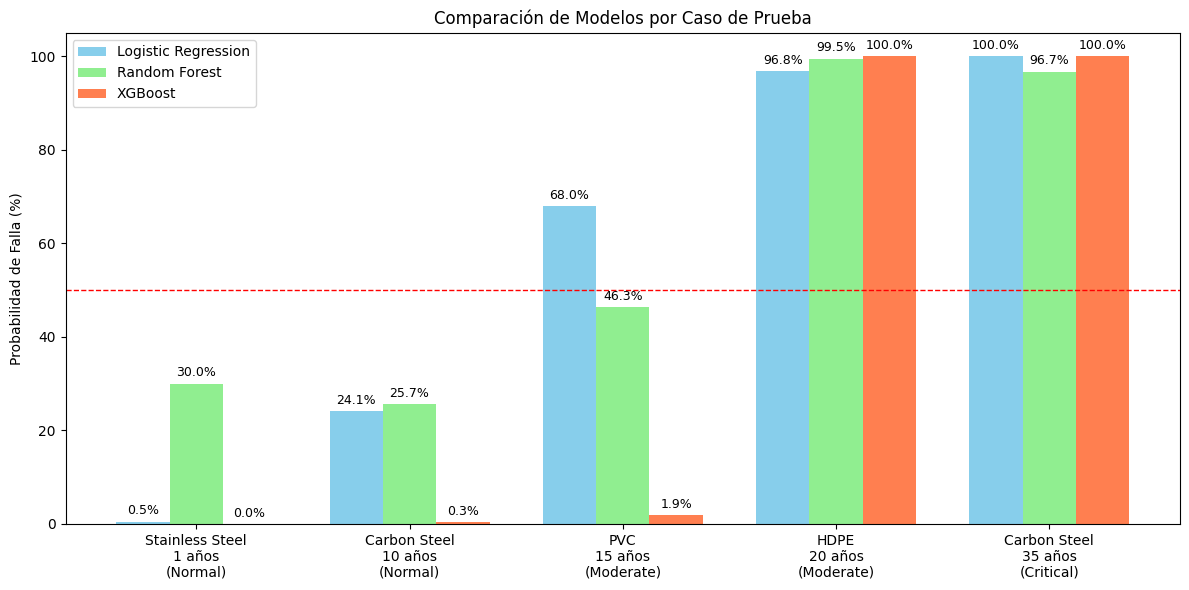

Interpretación Visual:
1. Barras alineadas = Consenso (Seguridad).
2. Barras desiguales = Incertidumbre (Donde el experto debe decidir).


In [28]:
import matplotlib.pyplot as plt
import numpy as np

#Visualizacion Comparativa
print("\Generando Gráfico Comparativo...")

# Preparamos los datos para el gráfico
# Convertimos las strings de porcentaje 'XX.X%' a números flotantes
for col in resultados.columns:
    if 'Prob_' in col:
        resultados[f'{col}_Num'] = resultados[col].str.rstrip('%').astype(float)

# Configuración del Gráfico
x = np.arange(len(resultados))  # Posiciones de los grupos
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))

# Dibujamos las barras de cada modelo
rects1 = ax.bar(x - width, resultados['Prob_Logistic Regression_Num'], width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar(x, resultados['Prob_Random Forest_Num'], width, label='Random Forest', color='lightgreen')
rects3 = ax.bar(x + width, resultados['Prob_XGBoost_Num'], width, label='XGBoost', color='coral')

# Etiquetas y Títulos
ax.set_ylabel('Probabilidad de Falla (%)')
ax.set_title('Comparación de Modelos por Caso de Prueba')
ax.set_xticks(x)
# Creamos etiquetas personalizadas para el eje X (Material + Años + Condición)
labels = [f"{m}\n{y} años\n({c})" for m, y, c in zip(resultados['Material'], resultados['Time_Years'], resultados['Condition'])]
ax.set_xticklabels(labels, rotation=0)
ax.legend()

# Línea de Corte de Seguridad (50%)
ax.axhline(y=50, color='red', linestyle='--', linewidth=1, label='Umbral de Riesgo (50%)')

# Función para añadir etiquetas de valor sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

print("Interpretación Visual:")
print("1. Barras alineadas = Consenso (Seguridad).")
print("2. Barras desiguales = Incertidumbre (Donde el experto debe decidir).")